# -----------------------------

# MP1 - Boyer Romain

# -----------------------------
## I - Fonctions

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 50 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 50 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((72,72))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

In [2]:
'''
Function to check the results of my models, and show a confusion matrix.
This function works for exercices 2 and 4.
The result is the higher value of the prediction.
'''


def verif_ex(range_ = 100, free_location = False, ex=2):

    score = [0,0,0]
    true_rec = [0,0,0]
    true_disk = [0,0,0]
    true_triangle = [0,0,0]

    for i in range(range_):
        X_test = generate_a_rectangle(free_location = free_location)
        if ex==2:
            X_test = X_test.reshape(1, X_test.shape[0])
        elif ex==4:
            X_test = X_test.reshape(-1,72,72,1)
        X_1 = model.predict(X_test)

        X = list(X_1[0])
        X = X.index(max(X))

        if X == 0:
            score[0]+=1
            true_rec[0] += 1
        elif X == 1:
            true_rec[1] += 1
        else:
            true_rec[2] += 1
            

    print('Rectangle check => score : '+str(score[0])+' / '+str(range_))

    for i in range(range_):
        X_test = generate_a_disk(free_location = free_location)
        if ex==2:
            X_test = X_test.reshape(1, X_test.shape[0])
        elif ex==4:
            X_test = X_test.reshape(-1,72,72,1)
        X_1 = model.predict(X_test)

        X = list(X_1[0])
        X = X.index(max(X))

        if X == 1:
            score[1]+=1
            true_disk[1] += 1
        elif X == 0:
            true_disk[0] += 1
        else:
            true_disk[2] += 1

    print('Disk check => score : '+str(score[1])+' / '+str(range_))        

    for i in range(range_):
        X_test = generate_a_triangle(free_location = free_location)[0]
        if ex==2:
            X_test = X_test.reshape(1, X_test.shape[0])
        elif ex==4:
            X_test = X_test.reshape(-1,72,72,1)        
        X_1 = model.predict(X_test)

        X = list(X_1[0])
        X = X.index(max(X))

        if X == 2:
            score[2]+=1
            true_triangle[2] += 1
        elif X == 0:
            true_triangle[0] += 1
        else:
            true_triangle[1] += 1

    print('Triangle check => score : '+str(score[2])+' / '+str(range_))
    print('- '*20)

    print('score total : '+str(sum(score))+' / '+str(range_*3) + ' => '+str(sum(score)/(3*range_)*100)+' %')
    print('- '*20)
    
    print('prediction on rectangle : '+str(true_rec))
    print('prediction on disk :      '+str(true_disk))
    print('prediction on triangle :  '+str(true_triangle))

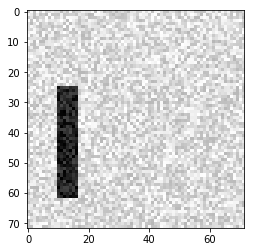

In [3]:
im = generate_a_rectangle(100, True)
plt.imshow(im.reshape(72,72), cmap='gray')

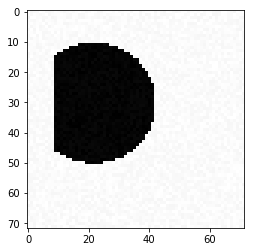

In [4]:
im = generate_a_disk(10, free_location=True)
plt.imshow(im.reshape(72,72), cmap='gray')

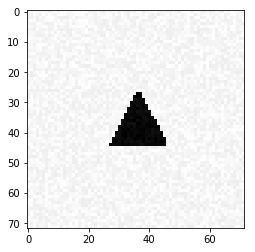

In [5]:
[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(72,72), cmap='gray')

## II - EXO
### 1 - Librairies

In [6]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.models import Sequential
from keras.utils import np_utils 
from keras import optimizers
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


### 2 - Simple Classification
#### 1 - SGD ~~ loss == 0.002

In [ ]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

In [ ]:
'''
Reshape the Y_train to fit the model
'''
Y_train = np_utils.to_categorical(Y_train, 3)
input_shape = (X_train.shape[1],)

In [ ]:
'''
Finding a good learning rate to the SGD optimizer => resultat lr=0.00085.
First : get_new_model => create a new model for the next function.
Second : plot_lr => plot the loss function of epochs of different model based on their SGD learning rate. 
After several tries, the best rate is lr = 0.0085. Its reach for more than 300 epochs
'''

def get_new_model():
    model = Sequential()
    model.add(Dense(300, activation='relu', input_shape=input_shape))
    model.add(Dense(3))
    return model

def plot_lr(lr_to_test, epochs = 10, plot_start = 2):
    plt.figure(figsize=(9,7))

    for lr in lr_to_test:
        print('Testing model for lr = '+str(lr))

        model = get_new_model()
        opt = optimizers.SGD(lr=lr)
        model.compile(loss='mean_squared_error', optimizer=opt)

        fitted_model = model.fit(X_train, Y_train, batch_size=32, epochs=epochs, verbose=0)

        plt.plot(fitted_model.history['loss'][plot_start:], label=str(lr))

    plt.xlabel('Epochs + '+str(plot_start))
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()
    
#lr_to_test = [.00001, .0001, .001, 0.01, 0.1]
#lr_to_test = [0.0001, 0.001, 0.01]
#lr_to_test = [0.00080, 0.0009, 0.001, 0.0012, 0.0014]
#lr_to_test = [0.0014, 0.0016, 0.0018, 0.002]
#lr_to_test = [0.001, 0.002, 0.003, 0.004, 0.005] 
#lr_to_test = [0.003, 0.0025, 0.0035] 
lr_to_test = [0.0003, 0.0025, 0.0085, 0.00085] # best score for 0.0085 and epochs = 300 (with a plot test of 500 epochs)

plot_lr(lr_to_test, epochs=35, plot_start=5)

In [ ]:
'''
Creation of my model with a Dense 600, a ReLU activation. And no activation on the last layer.
'''

model = Sequential()
model.add(Dense(600, activation='relu', input_shape=input_shape))
model.add(Dense(3))

opt = optimizers.SGD(lr=0.0085)
model.compile(loss='mean_squared_error', optimizer=opt)
fitted_model = model.fit(X_train, Y_train, batch_size=32, epochs=315, verbose=0)

In [ ]:
plt.plot(fitted_model.history['loss'][15:])
plt.title('Loss plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
'''
Verification of my results on 600 images
'''
verif_ex(200, ex=2)

#### 2 - ADAM ~~ loss == 0.001

In [8]:
[X_train, Y_train] = generate_dataset_classification(16, 20)

Creating data:
0


In [9]:
'''
Reshape the Y_train to fit the model
'''
Y_train = np_utils.to_categorical(Y_train, 3)
input_shape = (X_train.shape[1],)

In [10]:
'''
Creation of my model with a Dense 600 layer, a ReLU activation. And no activation on the last layer
'''

model = Sequential()
model.add(Dense(600, activation='relu', input_shape=input_shape))
model.add(Dense(3))

model.compile(loss='mean_squared_error', optimizer='adam')

In [11]:
fitted_model = model.fit(X_train, Y_train, batch_size=32, epochs=1, verbose=0)

In [ ]:
plt.plot(fitted_model.history['loss'][5:])
plt.title('Loss plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
'''
Verification of my results on 600 images
'''
verif_ex(200, ex=2)

### 3 - Visualization of the Solution

In [12]:
weights = model.get_weights()

In [13]:
for i in range(4):
    print(i)
    print(weights[i].shape)
    print('- '*40)

0
(5184, 600)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
1
(600,)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
2
(600, 3)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
3
(3,)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


In [ ]:
weights_matrix = np.dot(weights[0], weights[2])
weights_matrix = weights_matrix.reshape(72,72,-1)
plt.imshow(weights_matrix)
plt.show()

### 4 - A More Difficult Classification Problem

In [ ]:
'''
Generate a DataSet of 900 images
'''
[X_train, Y_train] = generate_dataset_classification(900, 20, True)

In [ ]:
'''
Reshape the Y_train to fit the model
Reshape the X_train to use Conv2D and MaxPool2D. For these 2 layers, a 2D image will fit better than an image in an array (1D)
'''
Y_train = np_utils.to_categorical(Y_train, 3)
X_train = X_train.reshape(-1,72,72,1)

In [ ]:
'''
Creation of the model
'''
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (72,72,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25)) # prevent overfitting

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dense(3))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, batch_size=30, epochs=50, verbose=1)

In [ ]:
plt.plot(fitted_model.history['loss'][3:])
plt.title('Loss plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
'''
Verification on 300 images
'''
verif_ex(range_=100, free_location=True, ex=4)